In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 04.1

In this exercise it is asked to add to the given MD code a way to equilibrate the phases. To do so I added in the <i>input.dat</i> file a parameter <i>irestart</i> by running *./multirun_equ.sh* (see README) that if it is set to $0$ will make the programm start from the configuration contained in <i>config.0</i>, otherwise the programm will use as the first configuration the printed last and second last configuration from the previous simulation (<i>old.0</i> and <i>old.final</i>) in order to use the $r_i(t-dt)$ coordinates needed for the code without having to extract them casually. Moreover, when restarting the programm it's fondamental to rescale the velocities in order to match the input temperature. At the beginning (*irestart* = 0) the code computes initial velocities randomly, but at each step energy is distributed among particles because of the collisions and, so, the velocities tend to assume a Maxwell distribution. Consequently, the temperature drops to lower values then the target one. Restarting the simulation we push the temperature up again by rescaling velocities by a factor: $ f_s= \sqrt{T_{target}/T_{actual}}=\sqrt{3 \ T_{target}/ \sum v^2}$.

This procedure if repeated a few times makes the phase equilibrate at the given temperature. 

I ran the code using as <i>input.dat</i> the <i>input</i> file for the liquid phase ($\rho^\star = 0.8$, $T^\star = 1.1$, $r_c^\star = 2.5$) for five times with a number of step equal to $1000$ and printed the value of the instant properties every $10$ step and, then, I made four other simulation with $10^4$ steps and measured the properties every $100$ steps. From the following plots we can see that at the ninth simulation the phase is equilibrated. 

Text(0.5, 1.0, 'equilibration of the energy*')

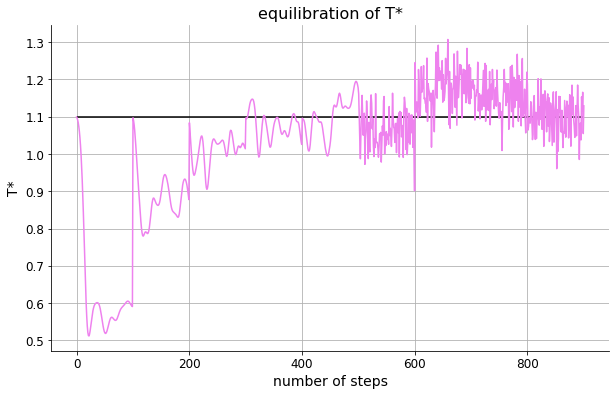

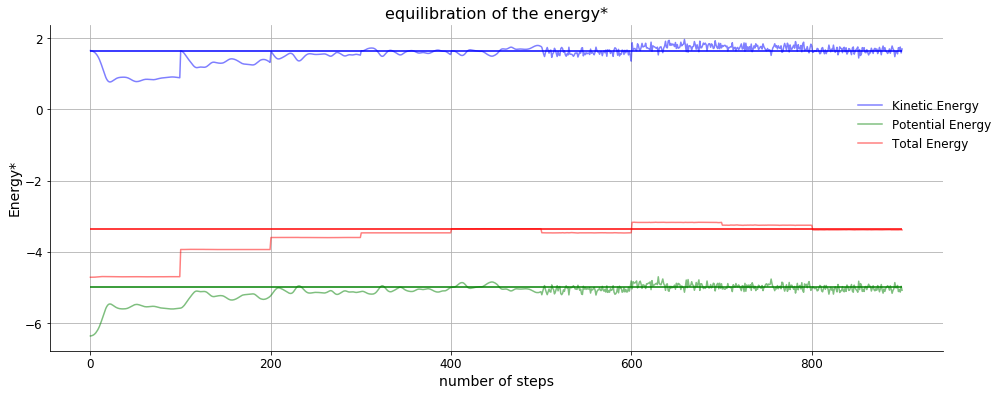

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x=np.linspace(0,900,900)
f_temp= np.loadtxt("risultati/instant_temp.out", usecols=(0), unpack='true')
ax.plot(x,f_temp,color = 'violet')
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"T*")
ax.hlines(1.1, 0, 900, color='black')
ax.grid(True)
ax.set_title(f"equilibration of T*")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

x=np.linspace(0,900,900)
f_ekin= np.loadtxt("risultati/instant_ekin.out", usecols=(0), unpack='true')
f_epot= np.loadtxt("risultati/instant_epot.out", usecols=(0), unpack='true')
f_etot= np.loadtxt("risultati/instant_etot.out", usecols=(0), unpack='true')
ax.plot(x,f_ekin, label = "Kinetic Energy", color='blue',alpha=0.5)
ax.plot(x,f_epot, label = "Potential Energy", color='green',alpha=0.5)
ax.plot(x,f_etot, label = "Total Energy", color='red',alpha=0.5)
ax.hlines(1.65, 0, 900,color='blue')
ax.hlines(-5, 0, 900,color='green')
ax.hlines(-3.35, 0, 900,color='red')
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"Energy*")
ax.grid(True)
ax.legend(loc=(0.9,0.6), frameon = False)
ax.set_title(f"equilibration of the energy*")

# Exercise 04.2

In this exercise the request was to add to the code a way to print the average value of the four propierties ($E_{tot}$, $E_{kin}$, $E_{pot}$ and $T$) as a function of the number of blocks $N$. Using the blocking method to calculate the uncertainties here becomes important: it unables to apply the Central Limit Theorem because it makes the values uncorrelated if the numbers of step in each block is properly high. For this purpose we made also another important adjustment within each block: the propierties are not evaluted at every step but at every $10$ steps so they are more uncorrelated and the error is not too small. 

In the following plot it is shown an example of the average values of the temperature for the liquid phase as a function of $N=100$ blocks with $1000$ steps for each block. Of course, this needs to be done after the proper equilibration. 

Text(0.5, 1.0, '$T*$ with error bars')

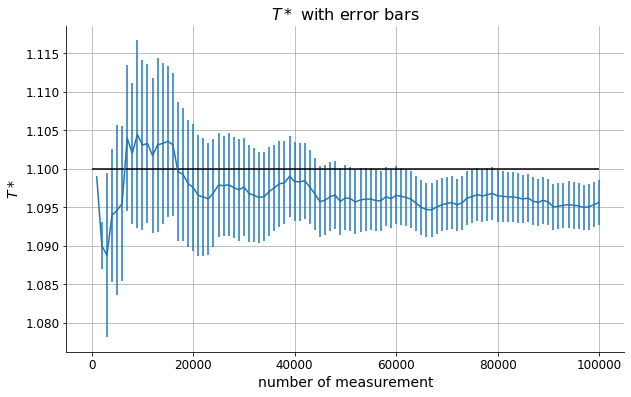

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
n_measure = 1000
x, f, error = np.loadtxt("risultati/liq_ave_temp.out", usecols=(0,2,3), unpack='true')
ax.errorbar(x*n_measure,f,yerr=error)
ax.hlines(1.1,0,100000)
ax.set_xlabel(r"number of measurement")
ax.set_ylabel(r"$T*$")
ax.grid(True)
ax.set_title(f"$T*$ with error bars")

# Exercise 04.3

The goal in this exercise is to calculate the average value of the four thermodynamic properties for the gas, the liquid and the solid phase of the Argon. To do so I used the same procedure as the previous exercise and then rescaled the values with the parameter $\epsilon$ equal to $120.380649x10^{-23} J$ for the energies and with the parameter $\epsilon/k_{B} = 120 K$ for the temperature. 

For the gas I didn't start from the configuration of the fcc (*config.fcc*) like in the case of the solid and the liquid but from a previous configuration of the liquid that I saved in the file *config.0gas*. In doing so the equilibration of the gas was quicker.

After the equilibration, for all three phases in order to evaluate the averages I used $N=100$ blocks with $1000$ (measuring the propierties every $10$ steps).

The conditions for the three phases are the followings: 
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

From the following plots we can conclude that the solid phase shows a stable trend, the liquid phase a less regular one and the gas phase a highly irregular one. We could expect these behaviours, because of the different internal structure and different freedom of motion of particles.


Text(0.5, 0.98, 'Solid phase - Argon')

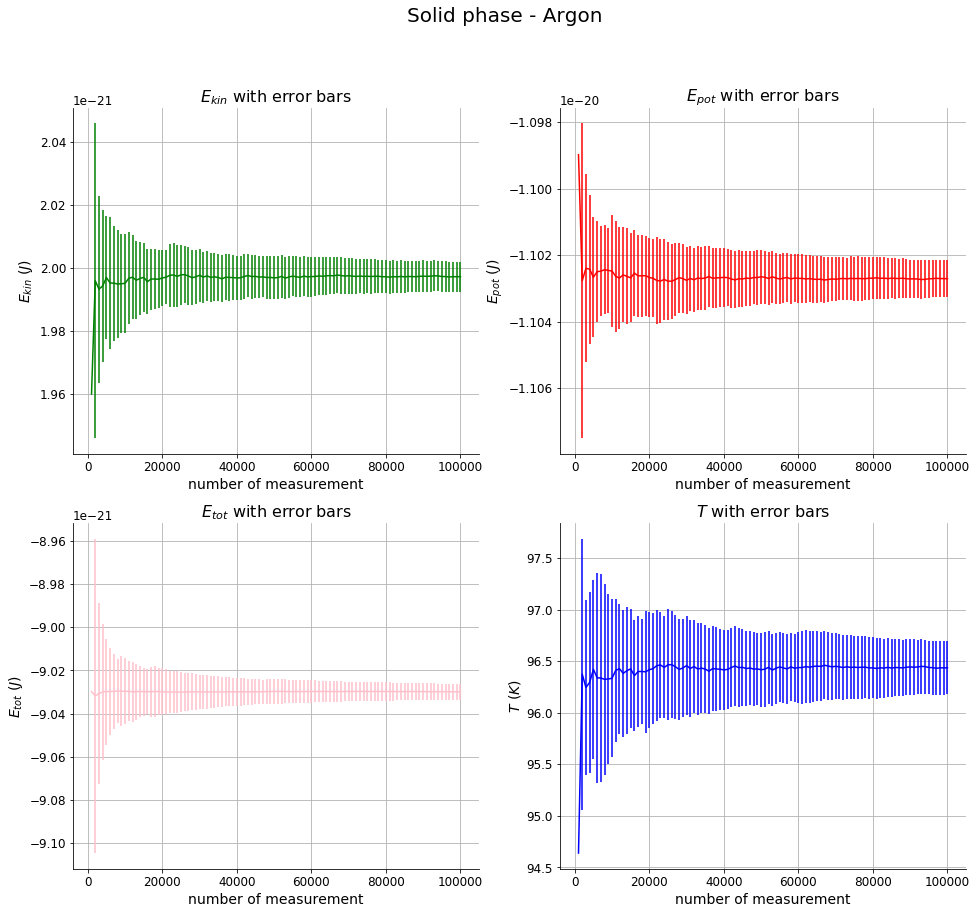

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
colors = ['green','red','pink','blue']
nblk = 100
n_measure = 1000 #numero di misure a ogni blocco 
epsilon = 120*1.380649e-23 

x = np.zeros((4,nblk))
f = np.zeros((4,nblk))
error = np.zeros((4,nblk))
prop = ["kin","pot","tot","temp"]
rescale = [epsilon, epsilon, epsilon, 120]

for i in range(4):
    if(i<3): x[i,:], f[i,:], error[i,:] = np.loadtxt(f"risultati/sol_ave_e{prop[i]}.out", usecols=(0,2,3), unpack='true')
    else: x[i,:], f[i,:], error[i,:] = np.loadtxt(f"risultati/sol_ave_{prop[i]}.out", usecols=(0,2,3), unpack='true')


for i in range(4):
    if(i<2): axx = ax[0,i] 
    else: axx = ax[1,i-2]
    axx.errorbar(x[i,:]*n_measure,f[i,:]*rescale[i],yerr=error[i,:]*rescale[i],color = colors[i])
    axx.set_xlabel(r"number of measurement")
    axx.grid(True)
    if(i < 3): 
        axx.set_ylabel(r"$E_{"f'{prop[i]}'r"}$ $(J)$")
        axx.set_title(r"$E_{"f'{prop[i]}'r"}$ with error bars")
    else:
        axx.set_ylabel(f"$T$ $(K)$")
        axx.set_title(f"$T$ with error bars")
        
fig.suptitle("Solid phase - Argon", fontsize=20)

Text(0.5, 0.98, 'Liquid phase - Argon')

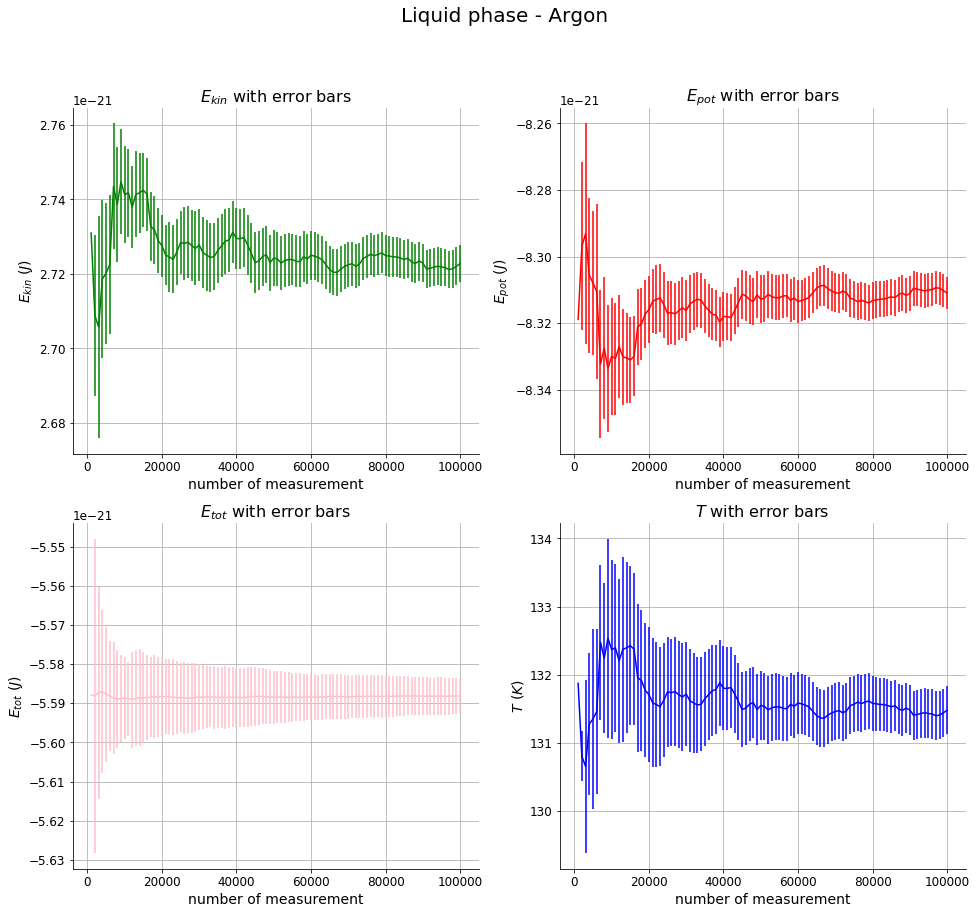

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
nblk = 100
n_measure = 1000

epsilon = 120*1.380649e-23 
x = np.zeros((4,nblk))
f = np.zeros((4,nblk))
error = np.zeros((4,nblk))
prop = ["kin","pot","tot","temp"]
rescale = [epsilon, epsilon, epsilon, 120]

for i in range(4):
    if(i<3): x[i,:], f[i,:], error[i,:] = np.loadtxt(f"risultati/liq_ave_e{prop[i]}.out", usecols=(0,2,3), unpack='true')
    else: x[i,:], f[i,:], error[i,:] = np.loadtxt(f"risultati/liq_ave_{prop[i]}.out", usecols=(0,2,3), unpack='true')


for i in range(4):
    if(i<2): axx = ax[0,i] 
    else: axx = ax[1,i-2]
    axx.errorbar(x[i,:]*n_measure,f[i,:]*rescale[i],yerr=error[i,:]*rescale[i],color = colors[i])
    axx.set_xlabel(r"number of measurement")
    axx.grid(True)
    if(i < 3): 
        axx.set_ylabel(r"$E_{"f'{prop[i]}'r"}$ $(J)$")
        axx.set_title(r"$E_{"f'{prop[i]}'r"}$ with error bars")
    else:
        axx.set_ylabel(f"$T$ $(K)$")
        axx.set_title(f"$T$ with error bars")
        
fig.suptitle("Liquid phase - Argon", fontsize=20)

Text(0.5, 0.98, 'Gas phase - Argon')

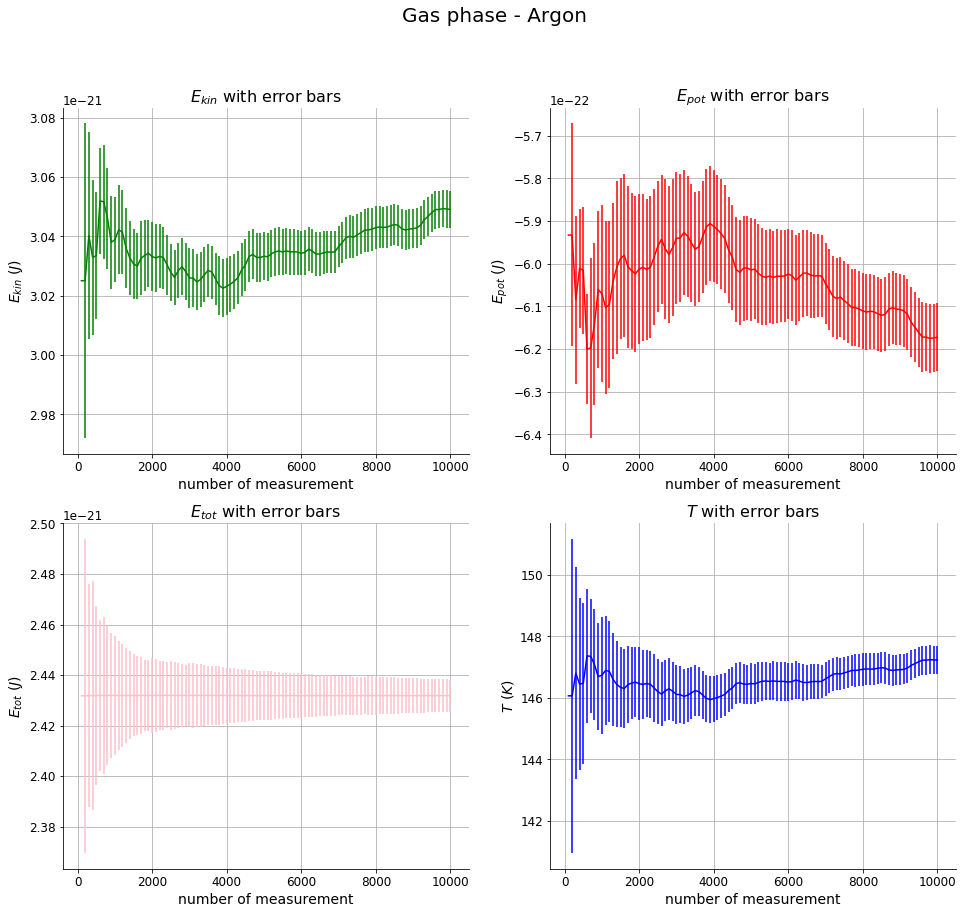

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
nblk = 100
n_measure = 100

epsilon = 120*1.380649e-23 

x = np.zeros((4,nblk))
f = np.zeros((4,nblk))
error = np.zeros((4,nblk))
prop = ["kin","pot","tot","temp"]
rescale = [epsilon, epsilon, epsilon, 120]

for i in range(4):
    if(i<3): x[i,:], f[i,:], error[i,:] = np.loadtxt(f"risultati/gas_ave_e{prop[i]}.out", usecols=(0,2,3), unpack='true')
    else: x[i,:], f[i,:], error[i,:] = np.loadtxt(f"risultati/gas_ave_{prop[i]}.out", usecols=(0,2,3), unpack='true')


for i in range(4):
    if(i<2): axx = ax[0,i] 
    else: axx = ax[1,i-2]
    axx.errorbar(x[i,:]*n_measure,f[i,:]*rescale[i],yerr=error[i,:]*rescale[i],color = colors[i])
    axx.set_xlabel(r"number of measurement")
    axx.grid(True)
    if(i < 3): 
        axx.set_ylabel(r"$E_{"f'{prop[i]}'r"}$ $(J)$")
        axx.set_title(r"$E_{"f'{prop[i]}'r"}$ with error bars")
    else:
        axx.set_ylabel(f"$T$ $(K)$")
        axx.set_title(f"$T$ with error bars")
        
fig.suptitle("Gas phase - Argon", fontsize=20)